Computational Carpentry Project

David Müller, Léa Lombard, Elisa Lemaire 

Part A - Data structures and functions 

1. 

In [8]:
import pandas as pd

df = pd.read_csv("/Users/elisalemaire/Desktop/cours/semestre 6/nummeth/periodic_table.csv") #the file's pathway

The pathway used is the one of the periodic table saved on our computer 

test :

In [34]:
df.head()   #first 5 rows

,AtomicNumber,Symbol,Name,AtomicMass,CPKHexColor,ElectronConfiguration,Electronegativity,AtomicRadius,IonizationEnergy,ElectronAffinity,OxidationStates,StandardState,MeltingPoint,BoilingPoint,Density,GroupBlock,YearDiscovered
0,1,H,Hydrogen,1.008000,FFFFFF,1s1,2.20,120.0,13.598,0.754,"+1, -1",Gas,13.81,20.28,0.000090,Nonmetal,1766
1,2,He,Helium,4.002600,D9FFFF,1s2,NaN,140.0,24.587,NaN,0,Gas,0.95,4.22,0.000179,Noble gas,1868
2,3,Li,Lithium,7.000000,CC80FF,[He]2s1,0.98,182.0,5.392,0.618,+1,Solid,453.65,1615.00,0.534000,Alkali metal,1817
3,4,Be,Beryllium,9.012183,C2FF00,[He]2s2,1.57,153.0,9.323,NaN,+2,Solid,1560.00,2744.00,1.850000,Alkaline earth metal,1798
4,5,B,Boron,10.810000,FFB5B5,[He]2s2 2p1,2.04,192.0,8.298,0.277,+3,Solid,2348.00,4273.00,2.370000,Metalloid,1808


By printing the first rows from the periodic table, it allows to test the code used and to prevent having errors. 

2. Python dictionary where the keys are elements symbol and the values are atomic masses :

In [35]:
symbol_mass_dict = dict(zip(df["Symbol"], df["AtomicMass"]))

test : 

In [36]:
print(dict(list(symbol_mass_dict.items())[:5])) #first 5 entries

{'H': 1.008, 'He': 4.0026, 'Li': 7.0, 'Be': 9.012183, 'B': 10.81}


3. Function that returns the molecular mass : 

In [37]:
import re


def molecular_mass(formula: str) -> float:
    #calculate the molecular mass 
    #match element symbols with numbers (e.g., H2, O, C6)
    pattern = r"([A-Z][a-z]?)(\d*)"
    tokens = re.findall(pattern, formula)

    total_mass = 0.0
    for (element, count) in tokens:
        count = int(count) if count else 1  # default to 1 if no number
        if element not in symbol_mass_dict:
            raise ValueError(f"Element {element} not found in periodic table.")
        total_mass += symbol_mass_dict[element] * count

    return total_mass

To ask the user for a chemical formula, the following code is used :

In [39]:
def ask_user_for_formula():
    formula = input("Enter a chemical formula (e.g. H2O, C6H12O6, NaCl): ").strip()
    try:
        mass = molecular_mass(formula)
        print(f"Molecular mass of {formula} = {mass:.3f}")
    except ValueError as e:
        print("Error:", e)

ask_user_for_formula()


Enter a chemical formula (e.g. H2O, C6H12O6, NaCl):  Ca(OH)2


Molecular mass of Ca(OH)2 = 57.087


This molecular mass calculator does not handle the parentheses, as shown with Ca(OH)2 above. 

4. Here is an extended molecular mass calculator : 

In [41]:
def molecular_mass(formula: str) -> float:
   
    def parse(s, i=0):
        total = 0.0
        element = ""
        count = ""

        while i < len(s):
            ch = s[i]

            if ch == "(":
                
                if element:
                    cnt = int(count) if count else 1
                    if element not in symbol_mass_dict:
                        raise ValueError(f"Unknown element: {element}")
                    total += symbol_mass_dict[element] * cnt
                    element = ""
                    count = ""
                
                group_mass, i = parse(s, i+1)
               
                mult = ""
                while i < len(s) and s[i].isdigit():
                    mult += s[i]; i += 1
                mult = int(mult) if mult else 1
                total += group_mass * mult

            elif ch == ")":
               
                if element:
                    cnt = int(count) if count else 1
                    if element not in symbol_mass_dict:
                        raise ValueError(f"Unknown element: {element}")
                    total += symbol_mass_dict[element] * cnt
                    element = ""
                    count = ""
                return total, i+1

            elif ch.isupper():
                # New element begins; flush previous one
                if element:
                    cnt = int(count) if count else 1
                    if element not in symbol_mass_dict:
                        raise ValueError(f"Unknown element: {element}")
                    total += symbol_mass_dict[element] * cnt
                element = ch
                count = ""
                i += 1

            elif ch.islower():
                element += ch
                i += 1

            elif ch.isdigit():
                count += ch
                i += 1

            else:
                # ignore unexpected characters (or raise if you prefer)
                i += 1

        if element:
            cnt = int(count) if count else 1
            if element not in symbol_mass_dict:
                raise ValueError(f"Unknown element: {element}")
            total += symbol_mass_dict[element] * cnt

        return total, i

    mass, _ = parse(formula)
    return mass

ask_user_for_formula()

Enter a chemical formula (e.g. H2O, C6H12O6, NaCl):  Ca(OH)2


Molecular mass of Ca(OH)2 = 74.094


5. Here is an extended mass calculator that handles coordinated water : 

In [42]:
def molecular_mass(formula: str) -> float:
   
    def parse(s, i=0):
        total = 0.0
        element = ""
        count = ""

        while i < len(s):
            ch = s[i]

            if ch == "(":
                # Flush pending element
                if element:
                    cnt = int(count) if count else 1
                    if element not in symbol_mass_dict:
                        raise ValueError(f"Unknown element: {element}")
                    total += symbol_mass_dict[element] * cnt
                    element, count = "", ""
                # Recurse into parentheses
                group_mass, i = parse(s, i+1)
                # Multiplier after parentheses
                mult = ""
                while i < len(s) and s[i].isdigit():
                    mult += s[i]; i += 1
                mult = int(mult) if mult else 1
                total += group_mass * mult

            elif ch == ")":
                # Flush pending element before closing
                if element:
                    cnt = int(count) if count else 1
                    if element not in symbol_mass_dict:
                        raise ValueError(f"Unknown element: {element}")
                    total += symbol_mass_dict[element] * cnt
                    element, count = "", ""
                return total, i+1

            elif ch.isupper():
                # Flush previous element
                if element:
                    cnt = int(count) if count else 1
                    if element not in symbol_mass_dict:
                        raise ValueError(f"Unknown element: {element}")
                    total += symbol_mass_dict[element] * cnt
                element, count = ch, ""
                i += 1

            elif ch.islower():
                element += ch
                i += 1

            elif ch.isdigit():
                count += ch
                i += 1

            else:
                i += 1

        # End of string: flush last element
        if element:
            cnt = int(count) if count else 1
            if element not in symbol_mass_dict:
                raise ValueError(f"Unknown element: {element}")
            total += symbol_mass_dict[element] * cnt

        return total, i

    # --- Handle hydrates (split by dot or middle dot) ---
    parts = re.split(r"[·.]", formula)  # split on '.' or '·'
    total_mass = 0.0
    for part in parts:
        part = part.strip()
        # Handle hydration numbers (e.g., "5H2O")
        match = re.match(r"^(\d+)([A-Za-z(].*)$", part)
        if match:
            mult = int(match.group(1))
            sub_formula = match.group(2)
            mass, _ = parse(sub_formula)
            total_mass += mult * mass
        else:
            mass, _ = parse(part)
            total_mass += mass

    return total_mass

ask_user_for_formula()

Enter a chemical formula (e.g. H2O, C6H12O6, NaCl):  C6H12O6


Molecular mass of C6H12O6 = 180.156


Part B - Stoichiometry and reaction balancing 

1. Reaction balancer function : 

In [48]:
from sympy import Matrix, lcm
from collections import defaultdict
import re

def parse_formula(formula):
    parts = re.findall('([A-Z][a-z]?)([0-9]*)', formula)
    counts = defaultdict(int)
    for (element, count) in parts:
        counts[element] += int(count) if count else 1
    return counts

def balance_reaction(reactants, products):
    compounds = reactants + products
    elements = sorted({el for compound in compounds for el in parse_formula(compound)})
    
    matrix = []
    for el in elements:
        row = []
        for compound in reactants:
            row.append(parse_formula(compound).get(el, 0))
        for compound in products:
            row.append(-parse_formula(compound).get(el, 0))
        matrix.append(row)
    
    m = Matrix(matrix)
    nullspace = m.nullspace()
    if not nullspace:
        raise ValueError("No solution found: reaction cannot be balanced.")
    
    vec = nullspace[0]

    lcm_denoms = lcm([val.q for val in vec])
    coeffs = [int(val * lcm_denoms) for val in vec]
    
    if any(c < 0 for c in coeffs):
        coeffs = [-c for c in coeffs]
    
    return coeffs

# Testing the function
def test_balance_reaction():

    # Reaction 1: C6H12O6 + O2 -> CO2 + H2O
    reactants = ["C6H12O6", "O2"]
    products = ["CO2", "H2O"]
    print("Reaction 1 coefficients:", balance_reaction(reactants, products))

    # Reaction 2: Fe + O2 -> Fe2O3
    reactants = ["Fe", "O2"]
    products = ["Fe2O3"]
    print("Reaction 2 coefficients:", balance_reaction(reactants, products))

    # Reaction 3: C6H6 + O2 -> CO2 + H2O
    reactants = ["C6H6", "O2"]
    products = ["CO2", "H2O"]
    print("Reaction 3 coefficients:", balance_reaction(reactants, products))

# Run tests
test_balance_reaction()
     


Reaction 1 coefficients: [1, 6, 6, 6]
Reaction 2 coefficients: [4, 3, 2]
Reaction 3 coefficients: [2, 15, 12, 6]


2. Mass conservation check : 

In [44]:
import re

# Molecular mass calculator
atomic_masses = {
    "H": 1.008, "He": 4.0026, "C": 12.011, "N": 14.007, "O": 15.999,
    "Na": 22.99, "Mg": 24.305, "Al": 26.982, "Si": 28.085, "P": 30.974,
    "S": 32.06, "Cl": 35.45, "K": 39.098, "Ca": 40.078, "Fe": 55.845,
    "Cu": 63.546, "Zn": 65.38
}

def molecular_mass(formula: str) -> float:
    pattern = r"([A-Z][a-z]?)(\d*)"
    tokens = re.findall(pattern, formula)
    total = 0.0
    for (element, count) in tokens:
        count = int(count) if count else 1
        if element not in atomic_masses:
            raise ValueError(f"Unknown element: {element}")
        total += atomic_masses[element] * count
    return total

# Check mass balance
def check_mass_balance(reactants, products, coeffs, tol=1e-6):
   
    n_react = len(reactants)
    reactant_coeffs = coeffs[:n_react]
    product_coeffs = coeffs[n_react:]

    reactant_mass = sum(c * molecular_mass(f) for c, f in zip(reactant_coeffs, reactants))
    product_mass = sum(c * molecular_mass(f) for c, f in zip(product_coeffs, products))

    return abs(reactant_mass - product_mass) < tol

# Example 1: 2H2 + O2 -> 2H2O
print(check_mass_balance(["H2", "O2"], ["H2O"], [2, 1, 2]))
# → True

# Example 2: C3H8 + 5O2 -> 3CO2 + 4H2O
print(check_mass_balance(["C3H8", "O2"], ["CO2", "H2O"], [1, 5, 3, 4]))
# → True

# Example 3: 4Fe + 3O2 -> 2Fe2O3
print(check_mass_balance(["Fe", "O2"], ["Fe2O3"], [4, 3, 2]))
# → True


True
True
True


One needs to enter, in the cell bellow, the reactants and the products as well as the stoichiometric number found with the reaction balancer function from Part B- 1. to compute the molecular mass calculator

In [28]:
print(check_mass_balance(["C3H8", "O2"], ["CO2", "H2O"], [1, 5, 3, 4]))

True


Verification that the total mass is conserved :

In [45]:
def verify_reaction(reactants, products, coeffs):
    balanced = check_mass_balance(reactants, products, coeffs)
    if balanced:
        print("The reaction is balanced by mass")
    else:
        print("The reaction is NOT balanced by mass")
    return balanced

# ---- Examples ----
# 1) 2H2 + O2 -> 2H2O
verify_reaction(["H2", "O2"], ["H2O"], [2, 1, 2])

# 2) C3H8 + 5O2 -> 3CO2 + 4H2O
verify_reaction(["C3H8", "O2"], ["CO2", "H2O"], [1, 5, 3, 4])

# 3) 4Fe + 3O2 -> 2Fe2O3
verify_reaction(["Fe", "O2"], ["Fe2O3"], [4, 3, 2])


The reaction is balanced by mass
The reaction is balanced by mass
The reaction is balanced by mass


True

Part C - Simulation/ Modeling 

Found estimated π = 3.143880, error compared to real π value = 0.002287



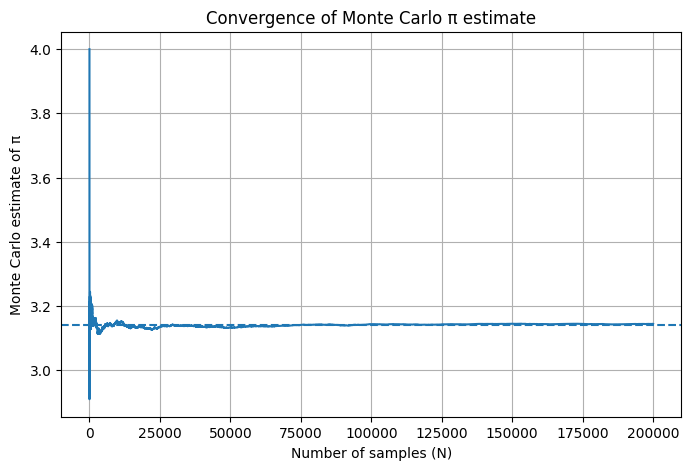

The reaction probability for normal distribution is 0.3674 ± 0.0034 with a 95% confidence interval (np.float64(0.3607184804528311), np.float64(0.3740815195471689)) with 7348 reactive collisions out of 20000 total collisions. The distribution parameters were {'loc': 1.0, 'scale': 0.6}

The reaction probability for uniform distribution is 0.3963 ± 0.0035 with a 95% confidence interval (np.float64(0.3895210302239352), np.float64(0.4030789697760648)) with 7926 reactive collisions out of 20000 total collisions. The distribution parameters were {'low': 0.0, 'high': 2.0}

The reaction probability for exponential distribution is 0.3009 ± 0.0032 with a 95% confidence interval (np.float64(0.29459314409099907), np.float64(0.3073068559090009)) with 6019 reactive collisions out of 20000 total collisions. The distribution parameters were {'scale': 1.0}


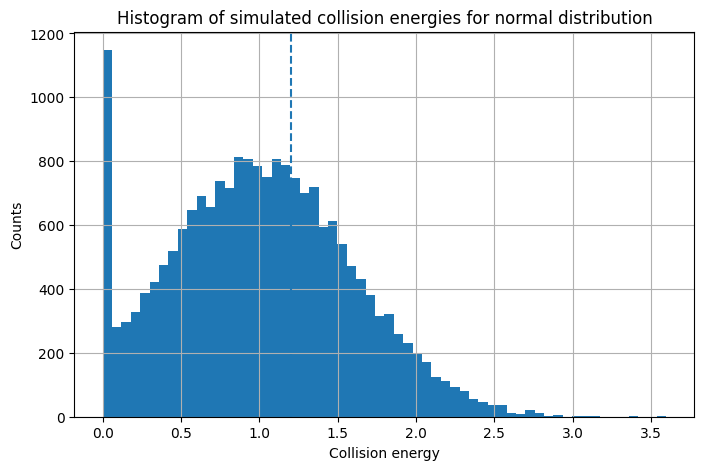

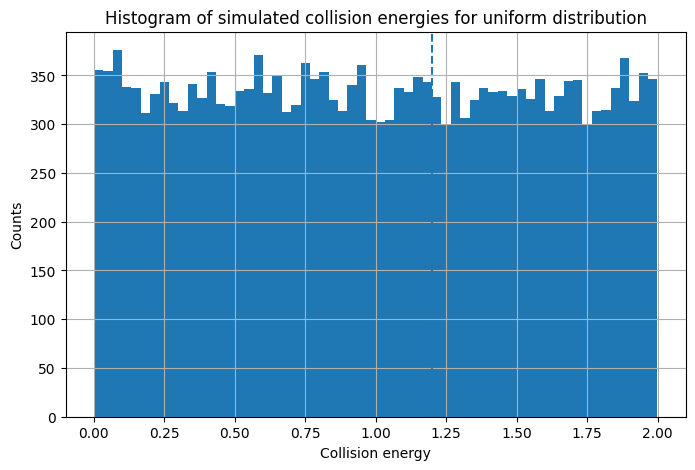

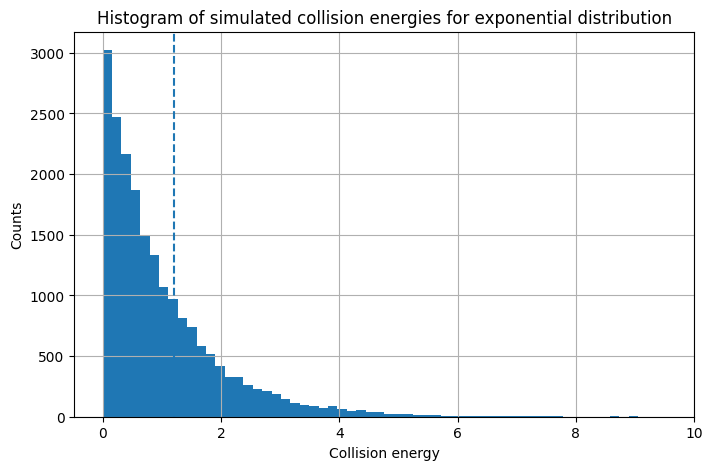

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Part C.1: Monte Carlo pi estimate

def estimate_pi(N, seed=None, return_history=False, history_step=1):
    if seed is not None:
        np.random.seed(seed)
    x = np.random.uniform(-1, 1, size=N)
    y = np.random.uniform(-1, 1, size=N)
    inside = (x**2 + y**2) <= 1.0
    count_inside = np.sum(inside)
    pi_est = 4.0 * count_inside / N
    
    if return_history:
        cumsum_inside = np.cumsum(inside)
        indices = np.arange(1, N+1)
        running_est = 4.0 * cumsum_inside / indices
        if history_step <= 1:
            history_x = indices
            history_est = running_est
        else:
            history_x = indices[::history_step]
            history_est = running_est[::history_step]
        return pi_est, history_x, history_est
    else:
        return pi_est

### The function works by generating N random points in the unit square [-1,1]x[-1,1], it generates them by sampling x and y coordinates uniformly from -1 to 1. 
### It then checks how many of these points fall inside the unit circle (x^2 + y^2 <= 1).
### The ratio of points inside the circle to the total number of points, multiplied by 4, gives an estimate of π. 
### If return_history is True, it also computes and returns the running estimate of π at intervals defined by history_step which is required to plot the convergence.
### It also gives the option to choose a seed for the randomizing for reproducibility.

# Test run
N_demo = 200000
pi_est, hist_x, hist_est = estimate_pi(N_demo, seed=42, return_history=True, history_step=10)
print(f"Found estimated π = {pi_est:.6f}, error compared to real π value = {abs(pi_est - np.pi):.6f}")
print("")
# Convergence plot
plt.figure(figsize=(8, 5))
plt.plot(hist_x, hist_est)
plt.axhline(np.pi, linestyle='--')
plt.xlabel("Number of samples (N)")
plt.ylabel("Monte Carlo estimate of π")
plt.title("Convergence of Monte Carlo π estimate")
plt.grid(True)
plt.show()

### Simple plot showing how the estimate of π converges to the true value as the number of samples increases with the value of π represented by a dashed line.

# Part C.2: Chemistry-inspired Monte Carlo collisions

def simulate_collisions(M, threshold, distribution='uniform', dist_params=None, seed=None):
    if seed is not None:
        np.random.seed(seed)
    if dist_params is None:
        dist_params = {}
    if distribution == 'uniform':
        low = dist_params.get('low', 0.0)
        high = dist_params.get('high', 2.0)
        energies = np.random.uniform(low, high, size=M)
        used_params = {'low': low, 'high': high}
    elif distribution == 'normal':
        loc = dist_params.get('loc', 1.0)
        scale = dist_params.get('scale', 0.5)
        energies = np.random.normal(loc=loc, scale=scale, size=M)
        energies = np.clip(energies, 0.0, None) # if negative energies
        used_params = {'loc': loc, 'scale': scale}
    elif distribution == 'exponential':
        scale = dist_params.get('scale', 1.0)
        energies = np.random.exponential(scale=scale, size=M)
        used_params = {'scale': scale}
    else:
        raise ValueError("distribution must be 'uniform', 'normal', or 'exponential'")
    
    count_reactive = np.sum(energies >= threshold)
    fraction = count_reactive / M
    std_err = np.sqrt(fraction * (1 - fraction) / M) if M > 0 else np.nan
    z = 1.96
    ci_low = max(fraction - z * std_err, 0.0)
    ci_high = min(fraction + z * std_err, 1.0)
    
    return {
        'M': M,
        'threshold': threshold,
        'distribution': distribution,
        'dist_params': used_params,
        'energies': energies,
        'count_reactive': int(count_reactive),
        'fraction_reactive': fraction,
        'std_error': std_err,
        '95ci': (ci_low, ci_high)
    }

### The function simulates M collision energies based on the specified distribution (uniform, normal, or exponential) and its parameters that can be specified as well.
### It counts how many of these energies exceed a given threshold, calculates the fraction of reactive collisions, 
### and computes the standard error and a 95% confidence interval for this fraction.
### The function returns a dictionary containing all relevant information about the simulation.
### It also gives the option to choose a seed for the randomizing for reproducibility.

# Test runs for each distribution
result_norm = simulate_collisions(20000, threshold=1.2, distribution='normal', dist_params={'loc':1.0, 'scale':0.6}, seed=24)
result_uni = simulate_collisions(20000, threshold=1.2, distribution='uniform', dist_params=None, seed=24)
result_exp= simulate_collisions(20000, threshold=1.2, distribution='exponential', dist_params=None, seed=24)

print(f"The reaction probability for {result_norm['distribution']} distribution is {result_norm['fraction_reactive']:.4f} ± {result_norm['std_error']:.4f} with a 95% confidence interval {result_norm['95ci']} with {result_norm['count_reactive']} reactive collisions out of {result_norm['M']} total collisions. The distribution parameters were {result_norm['dist_params']}")
print("")
print(f"The reaction probability for {result_uni['distribution']} distribution is {result_uni['fraction_reactive']:.4f} ± {result_uni['std_error']:.4f} with a 95% confidence interval {result_uni['95ci']} with {result_uni['count_reactive']} reactive collisions out of {result_uni['M']} total collisions. The distribution parameters were {result_uni['dist_params']}")
print("")
print(f"The reaction probability for {result_exp['distribution']} distribution is {result_exp['fraction_reactive']:.4f} ± {result_exp['std_error']:.4f} with a 95% confidence interval {result_exp['95ci']} with {result_exp['count_reactive']} reactive collisions out of {result_exp['M']} total collisions. The distribution parameters were {result_exp['dist_params']}")


### Plots for each distribution to get and idea of the energy distributions and the threshold

plt.figure(figsize=(8, 5))
plt.hist(result_norm['energies'], bins=60)
plt.axvline(result_norm['threshold'], linestyle='--')
plt.xlabel("Collision energy")
plt.ylabel("Counts")
plt.title("Histogram of simulated collision energies for normal distribution")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(result_uni['energies'], bins=60)
plt.axvline(result_uni['threshold'], linestyle='--')
plt.xlabel("Collision energy")
plt.ylabel("Counts")
plt.title("Histogram of simulated collision energies for uniform distribution")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(result_exp['energies'], bins=60)
plt.axvline(result_exp['threshold'], linestyle='--')
plt.xlabel("Collision energy")
plt.ylabel("Counts")
plt.title("Histogram of simulated collision energies for exponential distribution")
plt.grid(True)
plt.show()

